In [1]:
# Escuela de Negocios y Administración Pública
# Facultad de Ciencias Económicas - Universidad de Buenos Aires
# Gestión y procesamiento de base de datos y nociones de auditoría no presencial
# Esp. Cr. Alberto Falco

In [2]:
# Instalación de liberías.

In [3]:
# Importación de liberías.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Lectura del archivo csv.
df = pd.read_csv("database_combined.csv", dtype={"Customer ID":"object",
                                                 "Age":"Int64",
                                                 "Contact Number":"object",
                                                 "TransactionID":"object"})
df.head()

,Customer ID,First Name,Last Name,Age,Gender,Address,City,Contact Number,Email,Account Type,Account Balance,Date Of Account Opening,Last Transaction Date,TransactionID,Transaction Date,Transaction Type,Transaction Amount,Account Balance After Transaction,Label
0,1,Joshua,Hall,45,Male,Address_1,Fort Worth,19458794854,joshua.hall@kag.com,Current,1313.38,5/26/2006,4/23/2023,1,12/7/2023,Withdrawal,1457.61,2770.99,0
1,2,Mark,Taylor,47,Female,Address_2,Louisville,19458794855,mark.taylor@kag.com,Current,5988.46,3/2/2006,1/27/2023,2,4/27/2023,Deposit,1660.99,7649.45,0
2,3,Joseph,Flores,25,Female,Address_3,Philadelphia,19458794856,joseph.flores@kag.com,Current,8277.88,7/19/2015,1/1/2023,3,4/5/2023,Deposit,839.91,7437.97,0
3,4,Kevin,Lee,52,Other,Address_4,Oklahoma City,19458794857,kevin.lee@kag.com,Savings,7487.21,1/30/2008,8/2/2023,4,7/28/2023,Withdrawal,4908.89,12396.10,0
4,5,Linda,Johnson,68,Other,Address_5,Phoenix,19458794858,linda.johnson@kag.com,Savings,6993.55,5/25/2021,3/27/2023,5,1/16/2023,Transfer,589.07,6404.48,0


In [5]:
# Lectura de registros con label = 1.
df[df["Label"] == 1]

,Customer ID,First Name,Last Name,Age,Gender,Address,City,Contact Number,Email,Account Type,Account Balance,Date Of Account Opening,Last Transaction Date,TransactionID,Transaction Date,Transaction Type,Transaction Amount,Account Balance After Transaction,Label
8,9,Daniel,Moore,52,Male,Address_9,Indianapolis,NaN,daniel.moore@kag.com,Current,1109.30,NaN,11/5/2023,NaN,9/28/2023,Withdrawal,2036.771813,340.74,1
12,13,Margaret,Robinson,63,Female,Address_13,Columbus,19458794866,margaret.robinson@kag.com,Savings,5402.04,NaN,11/21/2023,13,12/2/2023,Deposit,3070.580000,NaN,1
23,24,Holly,NaN,30,Female,Address_24,San Antonio,19458794877,charles.adams@kag.com,Savings,3616.88,NaN,8/10/2023,24,1/25/2023,Deposit,4395.730000,8012.61,1
26,27,Lisa,Wilson,61,NaN,Address_27,NaN,19458794880,lisa.wilson@kag.com,Savings,NaN,7/27/2006,12/31/2023,27,NaN,Withdrawal,1594.080000,3767.44,1
33,34,Jessica,Davis,56,Other,Address_34,Oklahoma City,19458794887,jessica.davis@kag.com,NaN,6439.03,8/23/2005,9/7/2023,34,12/11/2023,Transfer,4135.400000,10574.43,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4917,4918,Nancy,Torres,28,Female,Address_4918,Phoenix,19458799771,nancy.torres@kag.com,Current,8945.14,12/24/2004,9/23/2023,NaN,4/19/2023,Transfer,3445.120000,5500.02,1
4923,4924,Susan,Nelson,30,Female,Address_4924,Houston,19458799777,susan.nelson@kag.com,Current,8586.29,3/18/2005,NaN,4924,3/30/2023,Withdrawal,NaN,5084.72,1
4966,4967,Carol,Sanchez,35,Male,Address_4967,Phoenix,19458799820,carol.sanchez@kag.com,NaN,NaN,1/19/2010,NaN,4967,12/6/2023,Withdrawal,1191.320000,10271.99,1
4975,4976,Andrew,Mitchell,47,Male,NaN,Omaha,19458799829,andrew.mitchell@kag.com,Current,6690.69,2/25/2003,10/8/2023,4976,10/16/2018,Deposit,3550.010000,3140.68,1


In [6]:
# Control de tipos de datos.
df.dtypes

,0
Customer ID,object
First Name,object
Last Name,object
Age,Int64
Gender,object
Address,object
City,object
Contact Number,object
Email,object
Account Type,object


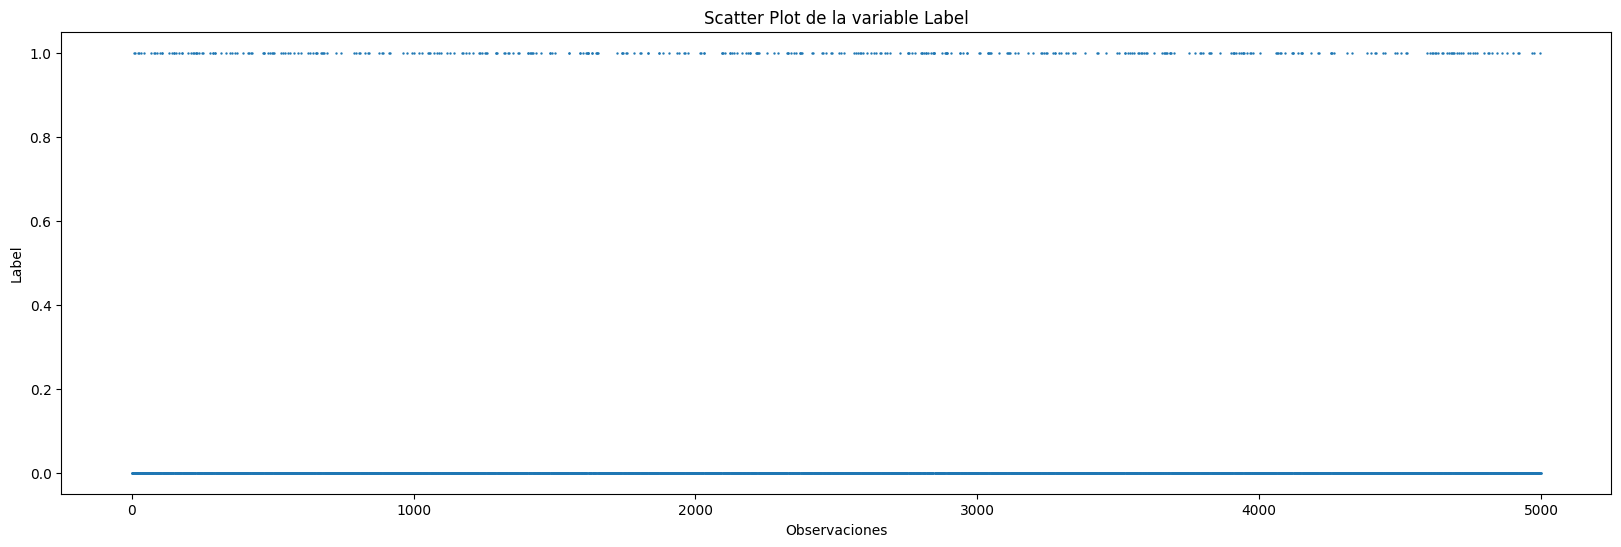

In [7]:
# Scatter plot para verificar la distribución de frecuencias de la variable Label dentro del dataset.
# El eje X lo constituye cada uno de los 5000 registros.
# El eje Y adquiere valores 0 o 1 dependiendo del atributo "Label".

plt.figure(figsize=(20, 6))  # Modifica el tamaño de la figura.
plt.scatter(range(len(df)), df['Label'], s=0.5)  # "s" controla el tamaño de los marcadores o puntos.
plt.xlabel('Observaciones')
plt.ylabel('Label')
plt.title('Scatter Plot de la variable Label')
plt.show()

## Preprocesamiento

In [32]:
# Copia del data frame para preprocesamiento.
df_preprocessed = df.copy()

In [33]:
# Recuento de valores únicos por atributo.
for col in df_preprocessed.columns:
  print(col, ":", df_preprocessed[col].nunique())

Customer ID : 4956
First Name : 74
Last Name : 74
Age : 65
Gender : 3
Address : 4962
City : 74
Contact Number : 4952
Email : 2180
Account Type : 2
Account Balance : 4939
Date Of Account Opening : 3710
Last Transaction Date : 365
TransactionID : 4927
Transaction Date : 400
Transaction Type : 3
Transaction Amount : 4925
Account Balance After Transaction : 4936
Label : 2


In [34]:
# Asignación de valores 1 y 0 para atributos no numéricos con posibles valores superiores a 10.
for col in df_preprocessed.columns:
  if pd.api.types.is_numeric_dtype(df_preprocessed[col]) or df_preprocessed[col].nunique() < 10:
    continue
  else:
    df_preprocessed[col] = df_preprocessed[col].apply(lambda x: 1 if pd.isna(x) or x == '' or str(x).strip() == "" else 0)

In [35]:
# Análisis de atributos para encoding.
for col in df_preprocessed.columns:
  if not(pd.api.types.is_numeric_dtype(df_preprocessed[col])) and df_preprocessed[col].nunique() < 10:
    print(df_preprocessed[col].value_counts(dropna=False))
  else:
    continue

Gender
Female    1709
Other     1628
Male      1620
NaN         43
Name: count, dtype: int64
Account Type
Savings    2480
Current    2466
NaN          54
Name: count, dtype: int64
Transaction Type
Deposit       1682
Withdrawal    1665
Transfer      1614
NaN             39
Name: count, dtype: int64


In [37]:
# Dtypes del data frame.
df_preprocessed.dtypes

,0
Customer ID,int64
First Name,int64
Last Name,int64
Age,Int64
Gender,object
Address,int64
City,int64
Contact Number,int64
Email,int64
Account Type,object


In [39]:
# Head del data frame.
df_preprocessed.head()

,Customer ID,First Name,Last Name,Age,Gender,Address,City,Contact Number,Email,Account Type,Account Balance,Date Of Account Opening,Last Transaction Date,TransactionID,Transaction Date,Transaction Type,Transaction Amount,Account Balance After Transaction,Label
0,0,0,0,45,Male,0,0,0,0,Current,1313.38,0,0,0,0,Withdrawal,1457.61,2770.99,0
1,0,0,0,47,Female,0,0,0,0,Current,5988.46,0,0,0,0,Deposit,1660.99,7649.45,0
2,0,0,0,25,Female,0,0,0,0,Current,8277.88,0,0,0,0,Deposit,839.91,7437.97,0
3,0,0,0,52,Other,0,0,0,0,Savings,7487.21,0,0,0,0,Withdrawal,4908.89,12396.10,0
4,0,0,0,68,Other,0,0,0,0,Savings,6993.55,0,0,0,0,Transfer,589.07,6404.48,0


Ingeniería de predictores.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [42]:
# División del set de datos en dos conjuntos: entrenamiento y prueba.
# El set de entrenamiento tendrá el 80% de las observaciones.
# El set de prueba tendrá el 20% restante para evaluar el desempeño de los modelos.
# Supuesto: no existe autocorrelación o correlación serial entre las observaciones. En otras palabras, se supone que no existe dependencia entre observaciones sucesivas o cercanas entre sí.
# Este supuesto permite hacer una partición aleatoria del set de datos, ya sea para prueba como para validación cruzada.

from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, random_state=42, stratify=df["Label"], test_size=0.2)


In [48]:
# Control de distribución de registros anómalos.
print(df_train["Label"].value_counts())
print(df_test["Label"].value_counts())

Label
0    3666
1     334
Name: count, dtype: int64
Label
0    917
1     83
Name: count, dtype: int64


In [50]:
# Obtención de atributos (X) y clases (y)
X_train, y_train = df_train.drop(columns=["Label"]), df_train["Label"]
X_test, y_test = df_test.drop(columns=["Label"]), df_test["Label"]

In [ ]:
# prompt: Crear un pipeline de sklearn que aplique one hot encoding si la cantidad de valores que asume un atributo es menor o igual a 10. En caso de que un atributo supere los 10 posibles valores, realizar un drop del atributo.

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

class CustomTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        self.columns_to_drop = []
        self.columns_to_encode = []

        for col in X.select_dtypes(include=['object', 'category']):
            if X[col].nunique() <= 10:
                self.columns_to_encode.append(col)
            else:
                self.columns_to_drop.append(col)

        self.encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
        self.encoder.fit(X[self.columns_to_encode])
        return self

    def transform(self, X):
        X_transformed = X.copy()
        X_transformed = X_transformed.drop(columns=self.columns_to_drop, errors='ignore')

        encoded_features = self.encoder.transform(X_transformed[self.columns_to_encode])
        encoded_df = pd.DataFrame(encoded_features, columns=self.encoder.get_feature_names_out(self.columns_to_encode))
        X_transformed = X_transformed.drop(columns=self.columns_to_encode)
        X_transformed = pd.concat([X_transformed.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

        return X_transformed


# Example usage (assuming X_train and X_test are defined as in your previous code)
pipeline = Pipeline([
    ('custom_transformer', CustomTransformer())
])


X_train_transformed = pipeline.fit_transform(X_train)
X_test_transformed = pipeline.transform(X_test)

print(X_train_transformed.head())
print(X_test_transformed.head())


In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


clf = DecisionTreeClassifier(random_state=42)
clf.fit(X=X_train, y=y_train)

ValueError: could not convert string to float: 'Elizabeth'

In [ ]:
y_pred = clf.predict(X_test)

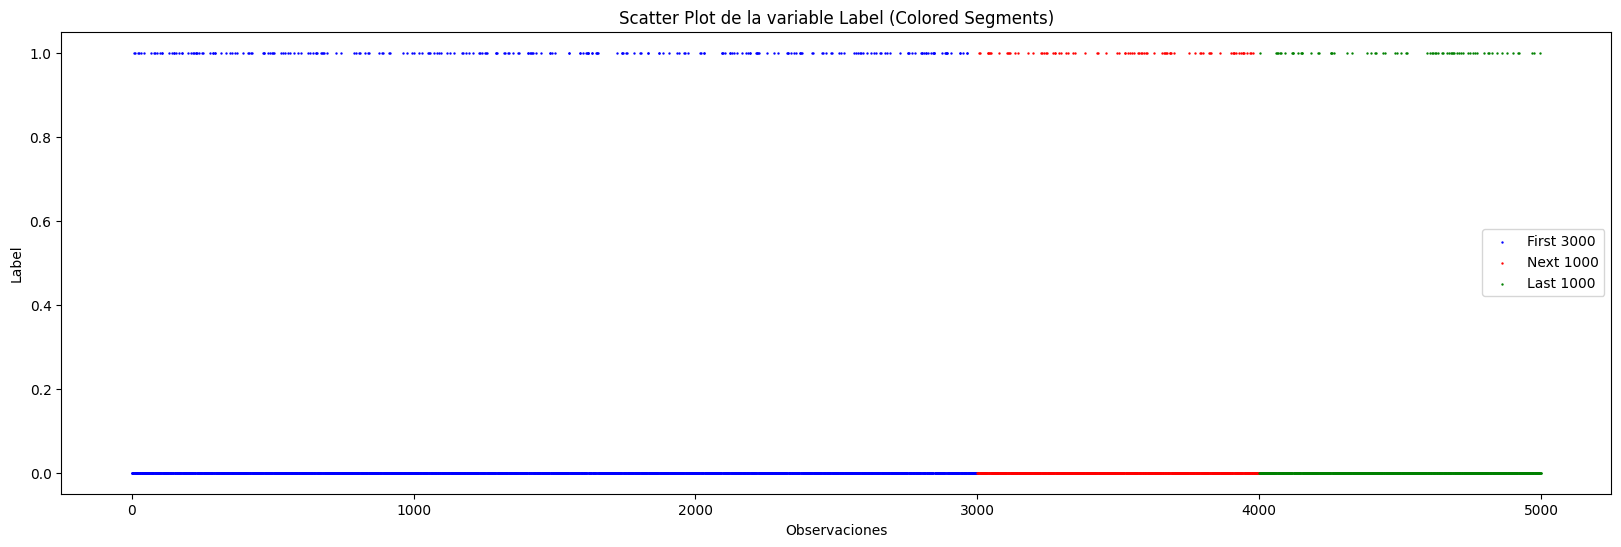

In [27]:
# División del set de datos en dos conjuntos: entrenamiento y prueba.
# El set de entrenamiento tendrá

plt.figure(figsize=(20, 6))

# Scatter plot with different colors for different segments
plt.scatter(range(3000), df['Label'][:3000], s=0.5, c='blue', label='First 3000')
plt.scatter(range(3000, 4000), df['Label'][3000:4000], s=0.5, c='red', label='Next 1000')
plt.scatter(range(4000, 5000), df['Label'][4000:], s=0.5, c='green', label='Last 1000')


plt.xlabel('Observaciones')
plt.ylabel('Label')
plt.title('Scatter Plot de la variable Label (Colored Segments)')
plt.legend() # Muestra la leyenda
plt.show()
